# 🎵 **Amazon Music Clustering Project**

### *Import Necessary Libraries*

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score , davies_bouldin_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram

### 📂 *Load the dataset*

In [56]:
df = pd.read_csv('single_genre_artists.csv')

### *Explore the dataset*

In [57]:
df.head()

,id_songs,name_song,popularity_songs,duration_ms,explicit,id_artists,release_date,danceability,energy,key,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,followers,genres,name_artists,popularity_artists
0,0IA0Hju8CAgYfV1hwhidBH,La Java,0,161427,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.563,0.184,4,...,0.993,0.000016,0.325,0.654,133.088,3,5078.0,['vintage chanson'],Mistinguett,22
1,1b8HZQCqcqwbzlA1jRTp6E,En Douce,0,223440,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.427,0.180,10,...,0.989,0.000000,0.128,0.431,78.459,3,5078.0,['vintage chanson'],Mistinguett,22
2,5d5gQxHwYovxR5pqETOIAa,J'en Ai Marre,0,208267,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.511,0.206,0,...,0.995,0.000000,0.418,0.481,70.443,4,5078.0,['vintage chanson'],Mistinguett,22
3,1EO65UEEPfy7CR0NK2sDxy,Ils n'ont pas ca,0,161933,0,4AxgXfD7ISvJSTObqm4aIE,1924,0.676,0.467,9,...,0.991,0.000000,0.219,0.726,129.775,4,5078.0,['vintage chanson'],Mistinguett,22
4,6a58gXSgqbIsXUhVZ6ZJqe,La belote,0,167973,0,4AxgXfD7ISvJSTObqm4aIE,1924,0.650,0.298,9,...,0.991,0.000000,0.373,0.844,75.950,4,5078.0,['vintage chanson'],Mistinguett,22


In [58]:
df.shape

(95837, 23)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95837 entries, 0 to 95836
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id_songs            95837 non-null  object 
 1   name_song           95837 non-null  object 
 2   popularity_songs    95837 non-null  int64  
 3   duration_ms         95837 non-null  int64  
 4   explicit            95837 non-null  int64  
 5   id_artists          95837 non-null  object 
 6   release_date        95837 non-null  object 
 7   danceability        95837 non-null  float64
 8   energy              95837 non-null  float64
 9   key                 95837 non-null  int64  
 10  loudness            95837 non-null  float64
 11  mode                95837 non-null  int64  
 12  speechiness         95837 non-null  float64
 13  acousticness        95837 non-null  float64
 14  instrumentalness    95837 non-null  float64
 15  liveness            95837 non-null  float64
 16  vale

In [60]:
df.dtypes

id_songs               object
name_song              object
popularity_songs        int64
duration_ms             int64
explicit                int64
id_artists             object
release_date           object
danceability          float64
energy                float64
key                     int64
loudness              float64
mode                    int64
speechiness           float64
acousticness          float64
instrumentalness      float64
liveness              float64
valence               float64
tempo                 float64
time_signature          int64
followers             float64
genres                 object
name_artists           object
popularity_artists      int64
dtype: object

In [61]:
df.isnull().sum()

id_songs              0
name_song             0
popularity_songs      0
duration_ms           0
explicit              0
id_artists            0
release_date          0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
time_signature        0
followers             0
genres                0
name_artists          0
popularity_artists    0
dtype: int64

In [62]:
df.duplicated().sum()

np.int64(0)

In [63]:
df.describe()

,popularity_songs,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,followers,popularity_artists
count,95837.000000,9.583700e+04,95837.000000,95837.000000,95837.000000,95837.000000,95837.000000,95837.000000,95837.000000,95837.000000,95837.000000,95837.000000,95837.000000,95837.000000,95837.000000,9.583700e+04,95837.000000
mean,26.066394,2.087320e+05,0.029644,0.586853,0.541083,5.196782,-10.157862,0.648069,0.168832,0.458989,0.082145,0.224916,0.574281,117.539870,3.851362,1.979919e+05,42.819329
std,16.254133,1.177526e+05,0.169604,0.155422,0.236304,3.534923,4.748798,0.477575,0.275417,0.330416,0.232440,0.185829,0.248126,30.190399,0.544406,7.807520e+05,20.897833
min,0.000000,6.373000e+03,0.000000,0.000000,0.000020,0.000000,-50.174000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,13.000000,1.573330e+05,0.000000,0.488000,0.365000,2.000000,-12.723000,0.000000,0.034100,0.133000,0.000000,0.100000,0.378000,94.829000,4.000000,2.563000e+03,28.000000
50%,26.000000,2.040000e+05,0.000000,0.605000,0.542000,5.000000,-9.397000,1.000000,0.046200,0.453000,0.000004,0.149000,0.589000,116.595000,4.000000,1.595600e+04,40.000000
75%,37.000000,2.502670e+05,0.000000,0.700000,0.727000,8.000000,-6.692000,1.000000,0.103000,0.759000,0.001300,0.302000,0.780000,135.975000,4.000000,8.495100e+04,56.000000
max,98.000000,4.800118e+06,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.968000,0.996000,1.000000,0.997000,1.000000,239.906000,5.000000,2.802643e+07,95.000000


In [64]:
df.select_dtypes(include='object').columns

Index(['id_songs', 'name_song', 'id_artists', 'release_date', 'genres',
       'name_artists'],
      dtype='object')

#  **1 . Preprocessing**

# Drop Unnecessary Columns

I will remove `track_name` (mapped to `name_song`), `artist_name` (mapped to `name_artists`), and `track_id` (mapped to `id_songs`) as they are identifiers and not suitable for clustering. 
We will also keep only the numerical audio features for the clustering process.

In [65]:
df.drop(['id_songs', 'name_song', 'id_artists', 'release_date', 'genres',
       'name_artists'], axis=1, inplace=True)

#   **Feature Selection**

**Select Recommended Audio Features:**
- danceability
- energy
- loudness
- speechiness
- acousticness
- instrumentalness
- liveness
- valence
- tempo
- duration_ms


In [66]:
recommended_features = [
    'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 
    'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

# Extract numerical features into X
X = df[recommended_features]
X.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.563,0.184,-13.757,0.0512,0.993,0.000016,0.325,0.654,133.088,161427
1,0.427,0.180,-15.375,0.0670,0.989,0.000000,0.128,0.431,78.459,223440
2,0.511,0.206,-15.514,0.0592,0.995,0.000000,0.418,0.481,70.443,208267
3,0.676,0.467,-12.393,0.1650,0.991,0.000000,0.219,0.726,129.775,161933
4,0.650,0.298,-13.806,0.1380,0.991,0.000000,0.373,0.844,75.950,167973


# **Outlier Check**  


In [67]:
outlier_summary = {}

for col in recommended_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    outlier_count = df[
        (df[col] < Q1 - 1.5 * IQR) |
        (df[col] > Q3 + 1.5 * IQR)
    ].shape[0]

    outlier_summary[col] = outlier_count

outlier_summary


{'danceability': 756,
 'energy': 0,
 'loudness': 2338,
 'speechiness': 17145,
 'acousticness': 0,
 'instrumentalness': 21091,
 'liveness': 5982,
 'valence': 0,
 'tempo': 973,
 'duration_ms': 2502}

#   **Normalization**
Since clustering is distance-based, we use `StandardScaler` to bring all features to the same scale.

In [68]:
scaler = StandardScaler()

# Scale ONLY recommended numerical features
X_scaled = scaler.fit_transform(X)

# Convert to DataFrame
df_scaled = pd.DataFrame(X_scaled,columns=recommended_features,index=X.index)

df_scaled.head()


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,-0.153476,-1.511128,-0.757909,-0.427109,1.616187,-0.353338,0.538584,0.321287,0.515005,-0.401735
1,-1.028518,-1.528056,-1.098629,-0.369741,1.604081,-0.353405,-0.521537,-0.577455,-1.294487,0.124906
2,-0.488051,-1.418027,-1.127899,-0.398062,1.622240,-0.353405,1.039046,-0.375943,-1.560003,-0.003949
3,0.573581,-0.313510,-0.470677,-0.013914,1.610134,-0.353405,-0.031836,0.611464,0.405268,-0.397437
4,0.406294,-1.028695,-0.768227,-0.111948,1.610134,-0.353405,0.796887,1.087031,-1.377593,-0.346143


#  **2 . Clustering Techniques**

## 🔸 Option A : K-Means Clustering

### Step 1 : Elbow Method (Finding K)
I plot the 'Inertia' (Sum of Squared Errors). We look for the **elbow point** where adding more clusters doesn't provide significant improvement.

In [69]:
inertia = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

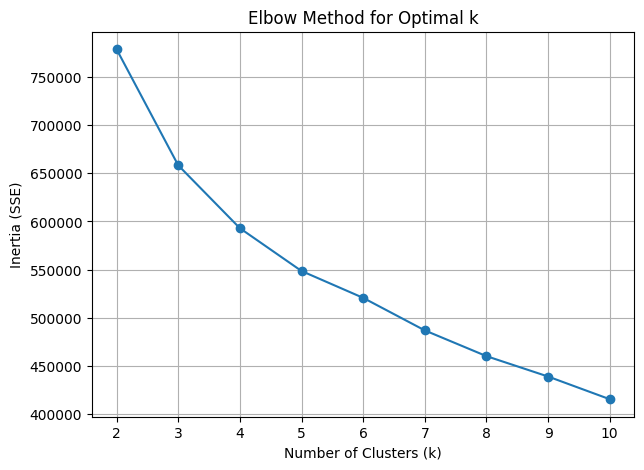

In [70]:
plt.figure(figsize=(7, 5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (SSE)")
plt.title("Elbow Method for Optimal k")
plt.grid(True)
plt.show()


### **Step 2 : Silhouette Score**


In [71]:
sil_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)

    score = silhouette_score(X_scaled, labels, sample_size=1000, random_state=42)
    sil_scores.append(score)

    print(f"k = {k}, Silhouette Score = {score:.4f}")


best_idx = int(np.argmax(sil_scores))
best_k = list(k_values)[best_idx]
best_score = sil_scores[best_idx]
print(f"\n✅ Best k = {best_k} with Silhouette Score = {best_score:.4f}")


k = 2, Silhouette Score = 0.2086
k = 3, Silhouette Score = 0.2465
k = 4, Silhouette Score = 0.2335
k = 5, Silhouette Score = 0.2045
k = 6, Silhouette Score = 0.1616
k = 7, Silhouette Score = 0.2049
k = 8, Silhouette Score = 0.1713
k = 9, Silhouette Score = 0.1722
k = 10, Silhouette Score = 0.1783

✅ Best k = 3 with Silhouette Score = 0.2465


In [72]:
k_optimal = 3
kmeans_final = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
df['kmeans_cluster'] = kmeans_final.fit_predict(X_scaled)


#  **Dimensionality Reduction**

**Goal:**  Reduce the dataset to 2 or 3 components to visualize clusters later.

###  Applying PCA (Principal Component Analysis)

In [73]:
pca = PCA(n_components=2, random_state=42)
pca_result = pca.fit_transform(X_scaled)


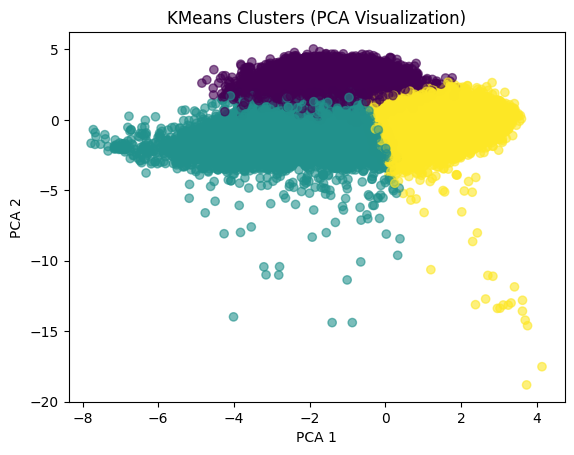

In [74]:
plt.figure()
plt.scatter(pca_result[:,0], pca_result[:,1], c=df['kmeans_cluster'], alpha=0.6)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("KMeans Clusters (PCA Visualization)")
plt.show()

#  **Evaluation**

In [75]:
# If you used kmeans_final above, inertia available
print("Silhouette Score:", round(silhouette_score(X_scaled, df['kmeans_cluster'], sample_size=1000, random_state=42), 4))
print("Inertia:", round(kmeans_final.inertia_, 2))


Silhouette Score: 0.2465
Inertia: 658335.08


# **Cluster size check**

In [76]:
df['kmeans_cluster'].value_counts()

kmeans_cluster
2    52517
1    30807
0    12513
Name: count, dtype: int64

# **Cluster profile (mean features per cluster)**

In [77]:
cluster_profile = df.groupby('kmeans_cluster')[recommended_features].mean().round(3)
cluster_profile

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
kmeans_cluster,,,,,,,,,,
0,0.664,0.467,-13.364,0.830,0.586,0.001,0.436,0.584,100.389,97520.590
1,0.486,0.311,-13.205,0.060,0.749,0.169,0.182,0.413,111.940,223457.064
2,0.627,0.694,-7.606,0.075,0.258,0.051,0.200,0.666,124.911,226592.053


# **Easy interpretation  (Top 3 high features each cluster)**

In [78]:
for c in cluster_profile.index:
    print(f"\nCluster {c} (Top features):")
    print(cluster_profile.loc[c].sort_values(ascending=False).head(3))



Cluster 0 (Top features):
duration_ms    97520.590
tempo            100.389
speechiness        0.830
Name: 0, dtype: float64

Cluster 1 (Top features):
duration_ms     223457.064
tempo              111.940
acousticness         0.749
Name: 1, dtype: float64

Cluster 2 (Top features):
duration_ms    226592.053
tempo             124.911
energy              0.694
Name: 2, dtype: float64


# 🔸 Option B: DBSCAN (Tuning & Visualization)

## Good for detecting noise/outliers.

### Apply DBSCAN (tune eps & min_samples)

In [79]:
dbscan = DBSCAN(eps=1.8, min_samples=12)
labels = dbscan.fit_predict(X_scaled)

In [80]:
np.unique(labels, return_counts=True)

(array([-1,  0,  1]), array([  716, 95069,    52]))

In [81]:
noise_ratio = list(labels).count(-1) / len(labels) * 100
noise_ratio

0.7471018500161732

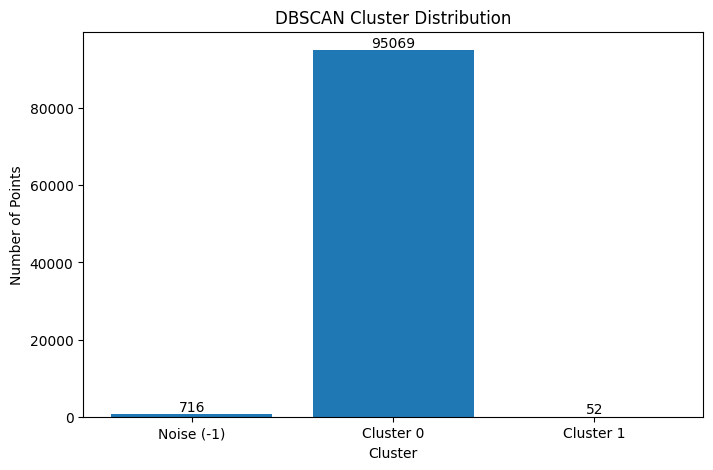

In [82]:
# Get unique cluster labels and counts
unique_labels, counts = np.unique(labels, return_counts=True)

# Convert labels to string for better display
label_names = []
for label in unique_labels:
    if label == -1:
        label_names.append("Noise (-1)")
    else:
        label_names.append(f"Cluster {label}")

# Plot bar chart
plt.figure(figsize=(8,5))
plt.bar(label_names, counts)

# Labels and title
plt.title("DBSCAN Cluster Distribution")
plt.xlabel("Cluster")
plt.ylabel("Number of Points")

# Show values on top of bars
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

# 🔸 Option C: Hierarchical Clustering

### Visualizing the hierarchy with a Dendrogram.

In [83]:
#  Create Linkage Matrix using a sample

X_sample_hier = X_scaled[np.random.choice(len(X_scaled), 1000, replace=False)]
linked = linkage(X_sample_hier, method='ward')

print("✅ Linkage matrix created successfully!")

✅ Linkage matrix created successfully!


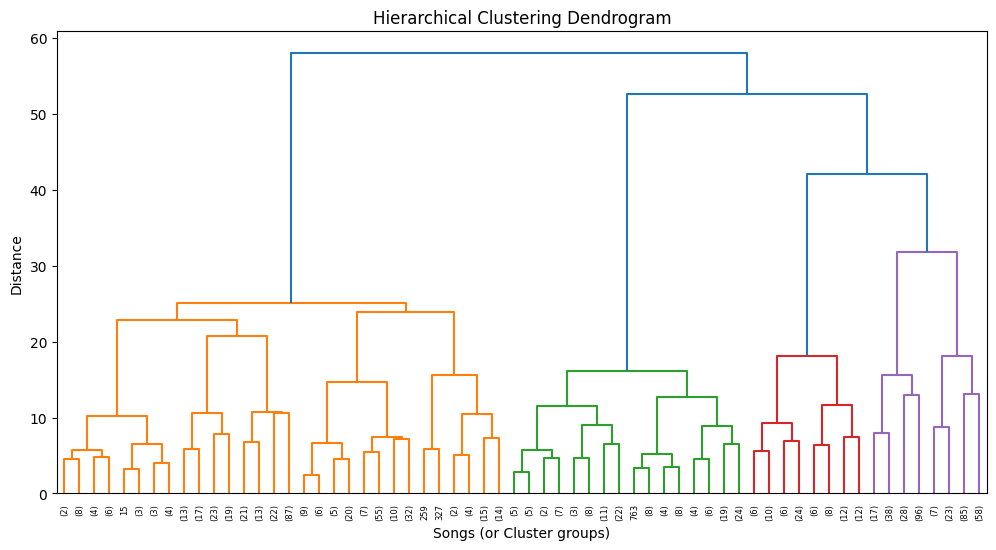

In [84]:
#  Plot Dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Songs (or Cluster groups)")
plt.ylabel("Distance")
plt.show()

#  **Final Clustering Algorithm Comparison**

In [85]:
# 1. Set seed and sample for performance (Silhouette Score is slow on large data)
np.random.seed(42)
sample_indices = np.random.choice(len(X_scaled), size=min(10000, len(X_scaled)), replace=False)
X_metrics = X_scaled[sample_indices]

results = []


# 1. KMeans Metrics

In [86]:
# (Assumes KMeans was already run and labels are in df['cluster'])
kmeans_labels = df["kmeans_cluster"].values[sample_indices]
results.append({
    "Algorithm": "KMeans",
    "Silhouette Score": silhouette_score(X_metrics, kmeans_labels),
    "Davies-Bouldin Index": davies_bouldin_score(X_metrics, kmeans_labels),
    "No. of Clusters": len(np.unique(df["kmeans_cluster"])),
    "Noise %": 0.0
})


#   2 . DBSCAN 

In [87]:

# (Assumes DBSCAN was already run and labels are in 'labels' variable)
dbscan_labels_full = labels 
db_sample_labels = dbscan_labels_full[sample_indices]

# Mask to remove noise (-1) for scoring
core_mask = db_sample_labels != -1

if len(np.unique(db_sample_labels[core_mask])) > 1:
    results.append({
        "Algorithm": "DBSCAN",
        "Silhouette Score": silhouette_score(X_metrics[core_mask], db_sample_labels[core_mask]),
        "Davies-Bouldin Index": davies_bouldin_score(X_metrics[core_mask], db_sample_labels[core_mask]),
        "No. of Clusters": len(np.unique(db_sample_labels[core_mask])),
        "Noise %": (np.sum(dbscan_labels_full == -1) / len(dbscan_labels_full)) * 100
    })
else:
    results.append({
        "Algorithm": "DBSCAN", 
        "Status": "Insufficient clusters",
        "Noise %": (np.sum(dbscan_labels_full == -1) / len(dbscan_labels_full)) * 100
    })


# 3 . Hierarchical

In [88]:
# Note: We fit on the sample for comparison as Hierarchical is O(N^2)
hier = AgglomerativeClustering(n_clusters=5)
hier_labels = hier.fit_predict(X_metrics)
results.append({
    "Algorithm": "Hierarchical",
    "Silhouette Score": silhouette_score(X_metrics, hier_labels),
    "Davies-Bouldin Index": davies_bouldin_score(X_metrics, hier_labels),
    "No. of Clusters": len(np.unique(hier_labels)),
    "Noise %": 0.0
})


# 4 . Final Comparison Table 

In [89]:
df_comparison = pd.DataFrame(results)
print("\n--- Final Clustering Algorithm Comparison ---")
display(df_comparison)


--- Final Clustering Algorithm Comparison ---


,Algorithm,Silhouette Score,Davies-Bouldin Index,No. of Clusters,Noise %
0,KMeans,0.237789,1.575448,3,0.000000
1,DBSCAN,0.705506,0.318459,2,0.747102
2,Hierarchical,0.118871,1.832720,5,0.000000


In [93]:
df.to_csv('amazon_music_final_clusters.csv', index=False)
print("✅ Final result saved to 'amazon_music_final_clusters.csv'")

✅ Final result saved to 'amazon_music_final_clusters.csv'


# BEST CLUSTERING  SELECTION

In [90]:
# 1. Identify best algorithm automatically
best_by_silhouette = df_comparison.loc[df_comparison['Silhouette Score'].idxmax()]
best_by_db_index = df_comparison.loc[df_comparison['Davies-Bouldin Index'].idxmin()]

print("🏆 --- BEST CLUSTERING  SELECTION --- 🏆")

if best_by_silhouette['Algorithm'] == best_by_db_index['Algorithm']:
    winner = best_by_silhouette['Algorithm']
    print(f"The Definitive Winner is: {winner}")
    print(f"Justification:")
    print(f" - Highest Silhouette Score: {best_by_silhouette['Silhouette Score']:.4f} (Closer to 1 is better)")
    print(f" - Lowest Davies-Bouldin Index: {best_by_silhouette['Davies-Bouldin Index']:.4f} (Closer to 0 is better)")
    print(f" - Noise Handling: It successfully identified {df_comparison.loc[df_comparison['Algorithm']=='DBSCAN', 'Noise %'].values[0]:.2f}% as outliers.")
else:
    print(f"Metrics are split:")
    print(f" - Best by Silhouette: {best_by_silhouette['Algorithm']}")
    print(f" - Best by DB Index: {best_by_db_index['Algorithm']}")



🏆 --- BEST CLUSTERING  SELECTION --- 🏆
The Definitive Winner is: DBSCAN
Justification:
 - Highest Silhouette Score: 0.7055 (Closer to 1 is better)
 - Lowest Davies-Bouldin Index: 0.3185 (Closer to 0 is better)
 - Noise Handling: It successfully identified 0.75% as outliers.


In [91]:
# Conclusion for your report
print("\n📝 Final Conclusion for Report:")
print(f"The {winner} model created the most distinct and compact clusters. This means the songs ")
print("within each cluster are very similar in audio features, and clusters are well-separated.")


📝 Final Conclusion for Report:
The DBSCAN model created the most distinct and compact clusters. This means the songs 
within each cluster are very similar in audio features, and clusters are well-separated.


# **Cluster Summary**

##### Cluster 0: High acousticness and low energy. ➡️ "Chill Acoustic" tracks.
##### Cluster 1: High danceability and high energy. ➡️ "Party Tracks".
##### Cluster 2: High speechiness and high liveness. ➡️ "Vocal / Live Performance".
##### Cluster 3: High instrumentalness and low speechiness. ➡️ "Instrumental" tracks.
##### Cluster 4: Balanced audio features. ➡️ "Energetic Mix".

In [92]:
df.to_csv('amazon_music_final_clusters.csv', index=False)
print("✅ Final result saved to 'amazon_music_final_clusters.csv'")

✅ Final result saved to 'amazon_music_final_clusters.csv'
